In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [296]:
data = pd.read_csv("Datasets/U.S._Gun_Violence_Records_2014-2021/US-Gun-Violence.csv")
data.head()

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2128682,September 29 2021,Illinois,Chicago,800 block of N Milwaukee Ave,0,5.0
1,2127374,September 28 2021,Illinois,Chicago,65th St and Calumet Ave,1,3.0
2,2128023,September 28 2021,Minnesota,Minneapolis,2700 block of Bloomington Ave,1,3.0
3,2126747,September 27 2021,New York,New York (Manhattan),3964 10th Ave,0,5.0
4,2126450,September 27 2021,Illinois,Chicago,826 N Ridgeway Ave,1,3.0


# First View of Data

In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3230 entries, 0 to 3229
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   incident_id     3230 non-null   int64  
 1   incident_date   3230 non-null   object 
 2   state           3230 non-null   object 
 3   city_or_county  3230 non-null   object 
 4   address         3225 non-null   object 
 5   killed          3230 non-null   int64  
 6   injured         3228 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 176.8+ KB


# Feature Engineering

## There are not much NaN values so we can simply Drop the Row which contains NaN Values

In [298]:
data = data.dropna()
data.isnull().sum()

incident_id       0
incident_date     0
state             0
city_or_county    0
address           0
killed            0
injured           0
dtype: int64

## Previously ["injured"] column was in "float64" dtype so i converted tp "int"

In [299]:
data["injured"] = data["injured"].astype("int")
data.head()

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2128682,September 29 2021,Illinois,Chicago,800 block of N Milwaukee Ave,0,5
1,2127374,September 28 2021,Illinois,Chicago,65th St and Calumet Ave,1,3
2,2128023,September 28 2021,Minnesota,Minneapolis,2700 block of Bloomington Ave,1,3
3,2126747,September 27 2021,New York,New York (Manhattan),3964 10th Ave,0,5
4,2126450,September 27 2021,Illinois,Chicago,826 N Ridgeway Ave,1,3


# EDA

In [300]:
injured_total = int(data.injured.sum())
killed_total = int(data.killed.sum())

print("Total Person Injured: {}".format(injured_total))
print("Total Person Killed: {}".format(killed_total))

Total Person Injured: 13508
Total Person Killed: 3408


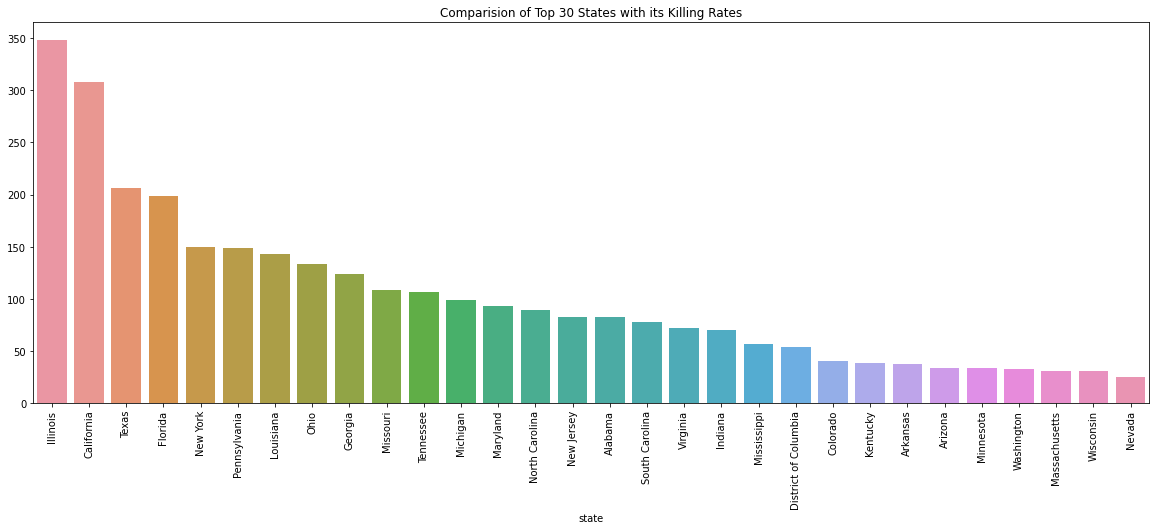

In [301]:
top30_kill_rates = data.groupby("state")["killed"].count().sort_values(ascending=False).head(30)
plt.figure(figsize=(20,7))
sns.barplot(x=top30_kill_rates.index, y=top30_kill_rates.values)
plt.title('Comparision of Top 30 States with its Killing Rates')
plt.xticks(rotation=90)
plt.show() 

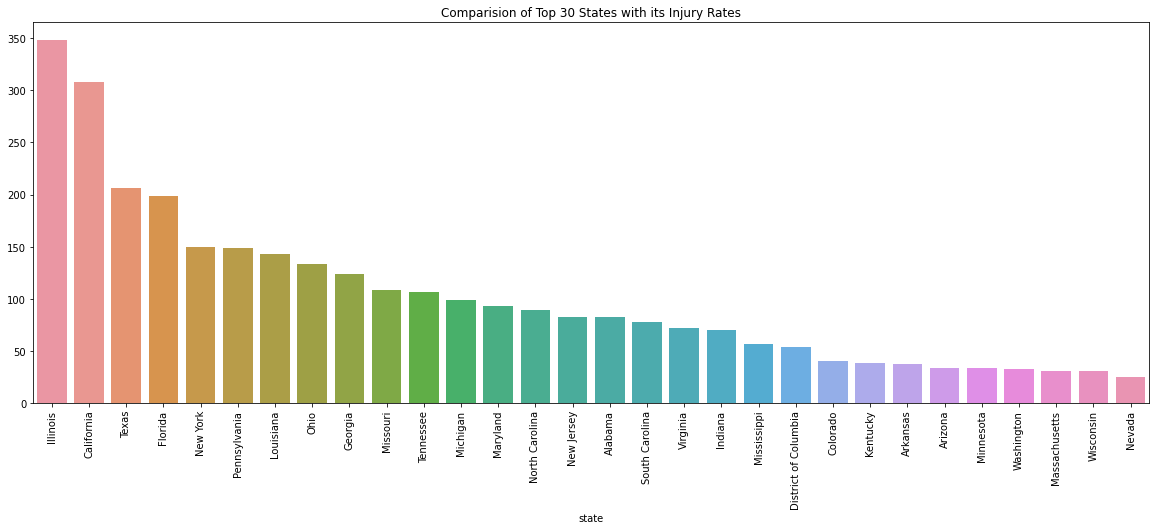

In [302]:
top30_injured_rates = data.groupby("state")["injured"].count().sort_values(ascending=False).head(30)
plt.figure(figsize=(20,7))
sns.barplot(x=top30_injured_rates.index, y=top30_injured_rates.values)
plt.title('Comparision of Top 30 States with its Injury Rates')
plt.xticks(rotation=90)
plt.show() 

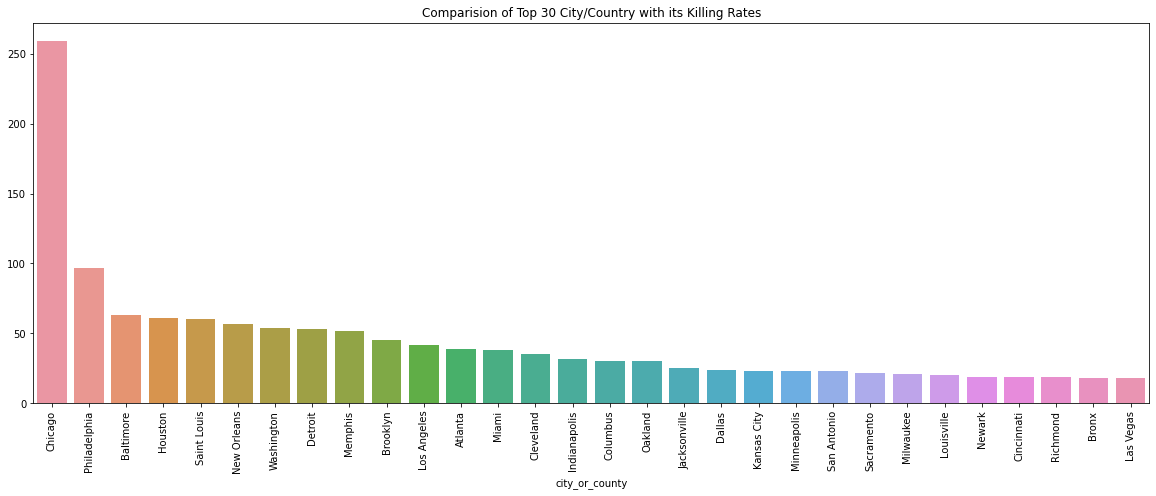

In [303]:
top30_killed_rates = data.groupby("city_or_county")["killed"].count().sort_values(ascending=False).head(30)
plt.figure(figsize=(20,7))
sns.barplot(x=top30_killed_rates.index, y=top30_killed_rates.values)
plt.title('Comparision of Top 30 City/Country with its Killing Rates')
plt.xticks(rotation=90)
plt.show() 

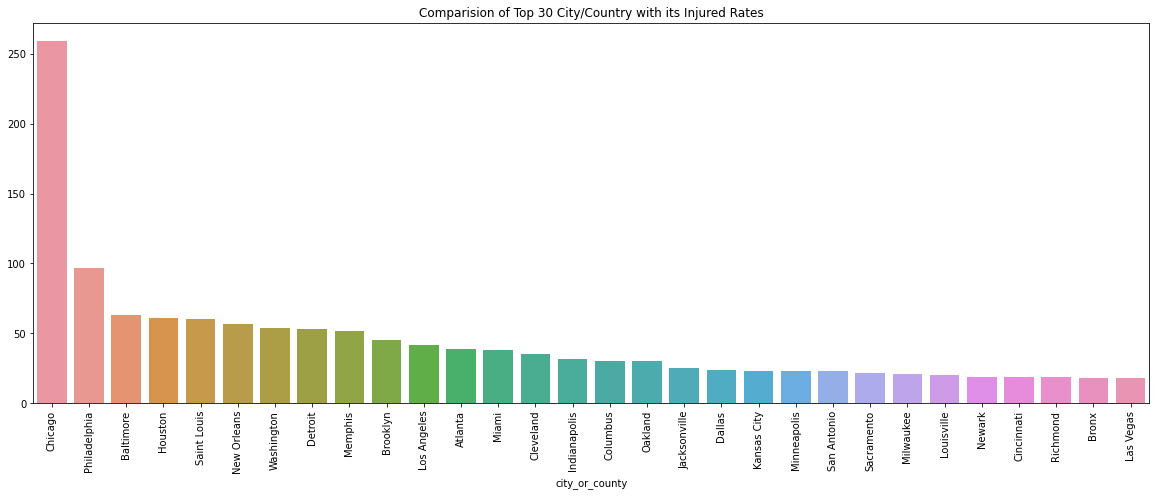

In [304]:
top30_injured_rates = data.groupby("city_or_county")["injured"].count().sort_values(ascending=False).head(30)
plt.figure(figsize=(20,7))
sns.barplot(x=top30_injured_rates.index, y=top30_injured_rates.values)
plt.title('Comparision of Top 30 City/Country with its Injured Rates')
plt.xticks(rotation=90)
plt.show() 

# Conclusion:
### I have not written any conclusion because this is not Yet completed because I am a bit upset with these datasets as you can compare all the 4 Graphs you can see injured and Killed columns are duplicated for city_or_country and states columns.

### May Be I could be wrong but Let See...

## ⌛ Work in Progress
